In [ ]:
# ============================
# 1. Imports
# ============================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# ============================
# 2. Load the three datasets
# ============================
# Make sure these filenames match exactly the uploaded files
df1 = pd.read_csv('/content/HateSpeechDataset_10k_balanced.csv')          # English
df2 = pd.read_excel('/content/training_data_telugu-hate.xlsx')            # Telugu
df3 = pd.read_csv('/content/Hindi_HateSpeech_Combined.csv')               # Hindi

print("Dataset 1 shape:", df1.shape)
print("Dataset 2 shape:", df2.shape)
print("Dataset 3 shape:", df3.shape)

# ============================
# 3. Standardize columns & labels
# ============================
# ---- Dataset 1 (English): Content, Label (0/1 already) ----
df1_clean = df1.rename(columns={'Content': 'text', 'Label': 'label'})
# Ensure numeric labels
df1_clean['label'] = df1_clean['label'].astype(int)

# ---- Dataset 2 (Telugu): Comments, Label ("hate" / others) ----
df2_clean = df2.rename(columns={'Comments': 'text', 'Label': 'label'})
df2_clean['label'] = df2_clean['label'].astype(str).str.strip().str.lower()
df2_clean['label'] = df2_clean['label'].apply(lambda x: 1 if x == 'hate' else 0)

# ---- Dataset 3 (Hindi): Post, Labels Set (multi-label string) ----
df3_clean = df3.rename(columns={'Post': 'text', 'Labels Set': 'label'})
def map_hindi_labels_to_binary(v):
    v = str(v).lower()
    # Mark as hate if contains any of these words
    if ('hate' in v) or ('offensive' in v) or ('abusive' in v):
        return 1
    else:
        return 0

df3_clean['label'] = df3_clean['label'].apply(map_hindi_labels_to_binary)

# Keep only text + label
df1_clean = df1_clean[['text', 'label']]
df2_clean = df2_clean[['text', 'label']]
df3_clean = df3_clean[['text', 'label']]

# ============================
# 4. Combine datasets
# ============================
combined_df = pd.concat([df1_clean, df2_clean, df3_clean], ignore_index=True)

# Drop rows with missing text
combined_df = combined_df.dropna(subset=['text'])

# Make sure label is int
combined_df['label'] = combined_df['label'].astype(int)

print("Combined dataset shape:", combined_df.shape)
print(combined_df.head())

# (Optional) Save combined dataset
combined_df.to_csv('combined_hate_dataset.csv', index=False)
print("Saved combined dataset to 'combined_hate_dataset.csv'")

# ============================
# 5. Train-test split
# ============================
X = combined_df['text']
y = combined_df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

# ============================
# 6. Build model pipeline (TF-IDF + Logistic Regression)
# ============================
model = Pipeline([
    ('tfidf', TfidfVectorizer(
        ngram_range=(1, 2),    # unigrams + bigrams
        max_features=50000,    # limit features to avoid huge matrices
        sublinear_tf=True
    )),
    ('clf', LogisticRegression(
        max_iter=1000,
        n_jobs=-1
    ))
])

# ============================
# 7. Train the model
# ============================
print("Training model...")
model.fit(X_train, y_train)
print("Training done.")

# ============================
# 8. Evaluate
# ============================
y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

# ============================
# 9. Example prediction
# ============================
examples = [
    "I hate you",                 # English
    "నీకు శాపమేస్తా",           # Telugu
    "तुम बहुत बेकार इंसान हो",   # Hindi
]

preds = model.predict(examples)
for text, label in zip(examples, preds):
    print(f"\nText: {text}")
    print("Prediction:", "HATE" if label == 1 else "NON-HATE")

Dataset 1 shape: (10000, 2)
Dataset 2 shape: (4000, 3)
Dataset 3 shape: (8192, 3)
Combined dataset shape: (22192, 2)
                                                text  label
0  quran bumpers like them worldwide should be sh...      1
1  is not the national rifle association that pro...      0
2  i hate that people think you can use it means ...      0
3             this lady is f king awesome during sex      0
4  mexico has done more to secure our border in d...      0
Saved combined dataset to 'combined_hate_dataset.csv'
Train size: 17753
Test size: 4439
Training model...
Training done.

Accuracy: 0.7578283397161523

Classification Report:

              precision    recall  f1-score   support

           0     0.7738    0.8442    0.8075      2670
           1     0.7274    0.6275    0.6737      1769

    accuracy                         0.7578      4439
   macro avg     0.7506    0.7358    0.7406      4439
weighted avg     0.7553    0.7578    0.7542      4439


Text: I hate you
Pr

Dataset shape: (22192, 2)
                                                text  label
0  quran bumpers like them worldwide should be sh...      1
1  is not the national rifle association that pro...      0
2  i hate that people think you can use it means ...      0
3             this lady is f king awesome during sex      0
4  mexico has done more to secure our border in d...      0
Train size: 17753
Test size: 4439
Training model: Logistic Regression

Model: Logistic Regression
Accuracy : 0.7578
Precision: 0.7274
Recall   : 0.6275
F1-score : 0.6737

Classification Report:
              precision    recall  f1-score   support

           0     0.7738    0.8442    0.8075      2670
           1     0.7274    0.6275    0.6737      1769

    accuracy                         0.7578      4439
   macro avg     0.7506    0.7358    0.7406      4439
weighted avg     0.7553    0.7578    0.7542      4439

Training model: Decision Tree

Model: Decision Tree
Accuracy : 0.6909
Precision: 0.6156
Recal

<Figure size 1000x600 with 0 Axes>

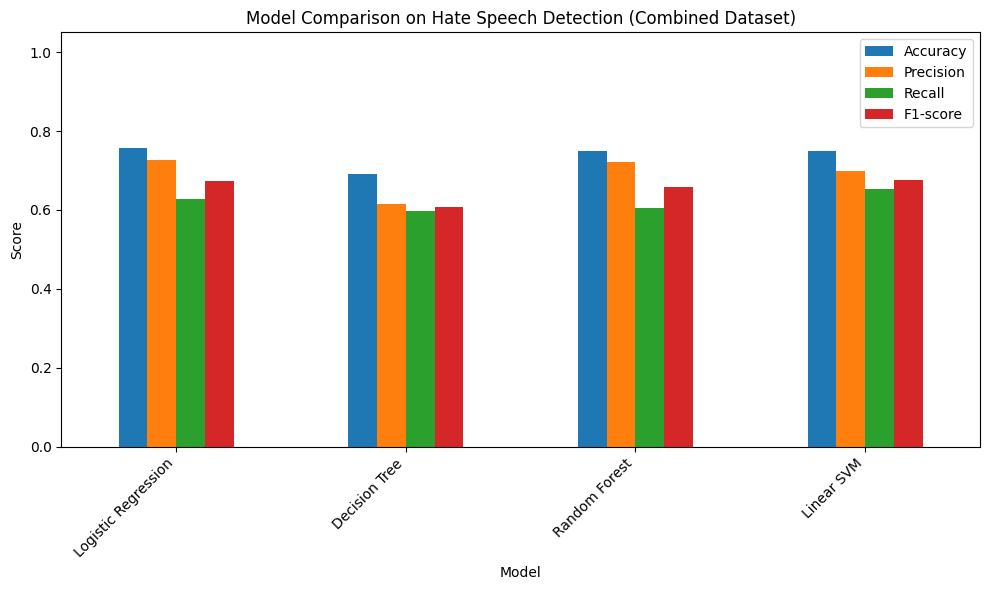

In [ ]:
# ============================================
# 1. Imports
# ============================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

import matplotlib.pyplot as plt

# ============================================
# 2. Load combined dataset
# ============================================
# Make sure this file is in your working directory
df = pd.read_csv("/content/combined_hate_dataset.csv")

# Expecting columns: 'text' and 'label'
print("Dataset shape:", df.shape)
print(df.head())

# Drop any missing values in text or label
df = df.dropna(subset=["text", "label"])

# Ensure label is integer (0/1)
df["label"] = df["label"].astype(int)

# ============================================
# 3. Train-test split
# ============================================
X = df["text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

# ============================================
# 4. TF-IDF Vectorization
# ============================================
tfidf = TfidfVectorizer(
    ngram_range=(1, 2),   # unigrams + bigrams
    max_features=50000,   # limit vocabulary size
    sublinear_tf=True
)

# Fit on train, transform train and test
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# ============================================
# 5. Define models
# ============================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ),
    "Linear SVM": LinearSVC()
}

# ============================================
# 6. Train & evaluate each model
# ============================================
metrics_list = []   # to store metrics for comparison graph

for name, model in models.items():
    print("=" * 60)
    print(f"Training model: {name}")
    model.fit(X_train_tfidf, y_train)

    # Predictions
    y_pred = model.predict(X_test_tfidf)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="binary")
    rec = recall_score(y_test, y_pred, average="binary")
    f1 = f1_score(y_test, y_pred, average="binary")

    # Print metrics
    print(f"\nModel: {name}")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    # Store metrics for later comparison
    metrics_list.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1
    })

# ============================================
# 7. Create comparison table & graph
# ============================================
results_df = pd.DataFrame(metrics_list)
print("\n\nSummary of Model Performance:")
print(results_df)

# Bar graph for comparison
plt.figure(figsize=(10, 6))
results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1-score"]].plot(
    kind="bar",
    figsize=(10, 6)
)

plt.title("Model Comparison on Hate Speech Detection (Combined Dataset)")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# ============================================
# (Optional) If you want to save a model, e.g. Logistic Regression
# ============================================
# from joblib import dump
# dump(models["Logistic Regression"], "log_reg_hate_model.joblib")
# dump(tfidf, "tfidf_vectorizer.joblib")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Training model: Bidirectional LSTM
Epoch 1/8
278/278 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6594 - loss: 0.5887 - val_accuracy: 0.7774 - val_loss: 0.4481
Epoch 2/8
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8488 - loss: 0.3420 - val_accuracy: 0.7616 - val_loss: 0.5178
Epoch 3/8
278/278 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9305 - loss: 0.1797 - val_accuracy: 0.7548 - val_loss: 0.6607
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

Bidirectional LSTM - Test Metrics
Accuracy : 0.7604
Precision: 0.7160
Recall   : 0.6610
F1-score : 0.6874

Classification Report:
              precision    recall  f1-score   support

           0     0.7862    0.8262    0.8057      1335
           1     0.7160    0.6610    0.6874       885

    accuracy                         0.7604      2220
   macro avg     0.7511    0.7436    0.7466      2220
weighted avg     0.7582    0.7604    0.7585      2220

Training model: 1D CNN
Epoch 1/8


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


278/278 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6496 - loss: 0.5913 - val_accuracy: 0.7616 - val_loss: 0.4561
Epoch 2/8
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8368 - loss: 0.3622 - val_accuracy: 0.7612 - val_loss: 0.5360
Epoch 3/8
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9393 - loss: 0.1725 - val_accuracy: 0.7575 - val_loss: 0.7149
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

1D CNN - Test Metrics
Accuracy : 0.7509
Precision: 0.6865
Recall   : 0.6904
F1-score : 0.6885

Classification Report:
              precision    recall  f1-score   support

           0     0.7940    0.7910    0.7925      1335
           1     0.6865    0.6904    0.6885       885

    accuracy                         0.7509      2220
   macro avg     0.7403    0.7407    0.7405      2220
weighted avg     0.7511    0.7509    0.7510      2220


Summary of Deep Learning Model Performance:
                Model  Accuracy  Precision    Recall  F1-score
0  Bidirectional LSTM  0.760360   0

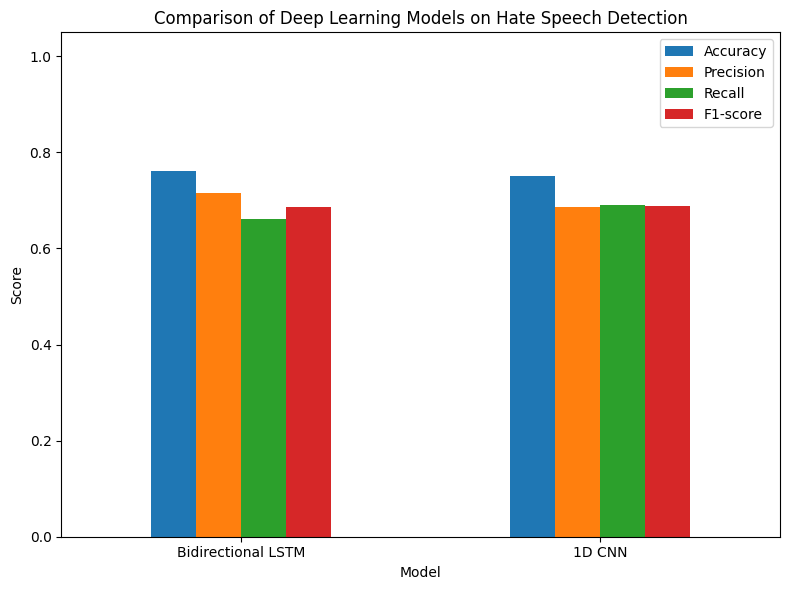

In [ ]:
# ============================================
# 1. Imports
# ============================================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding,
    LSTM,
    Bidirectional,
    Dense,
    Dropout,
    Conv1D,
    GlobalMaxPooling1D
)
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt  # << for comparison graph

# For reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# ============================================
# 2. Load combined dataset
# ============================================
df = pd.read_csv("/content/combined_hate_dataset.csv")

df = df.dropna(subset=["text", "label"])
df["label"] = df["label"].astype(int)

X = df["text"].astype(str).values
y = df["label"].values

# ============================================
# 3. Train/validation/test split
# ============================================
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=SEED, stratify=y_temp
)

# ============================================
# 4. Tokenization & Padding
# ============================================
max_words = 50000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_pad = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len)
X_val_pad   = pad_sequences(tokenizer.texts_to_sequences(X_val), maxlen=max_len)
X_test_pad  = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len)

vocab_size = min(max_words, len(tokenizer.word_index) + 1)

# ============================================
# 5. Build Deep Learning Models
# ============================================

# ---- BiLSTM MODEL ----
def create_bilstm_model(vocab_size, max_len, embed_dim=128, lstm_units=64, dropout_rate=0.5):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=max_len))
    model.add(Bidirectional(LSTM(lstm_units, return_sequences=True)))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(64, activation="relu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer="adam",
        metrics=["accuracy"]
    )
    return model

# ---- CNN MODEL ----
def create_cnn_model(vocab_size, max_len, embed_dim=128, filters=128, kernel_size=5, dropout_rate=0.5):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=max_len))
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation="relu"))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(64, activation="relu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer="adam",
        metrics=["accuracy"]
    )
    return model

# ============================================
# 6. Train & Evaluate Function
# ============================================
def train_and_evaluate(model, model_name,
                       X_train, y_train,
                       X_val, y_val,
                       X_test, y_test,
                       epochs=8, batch_size=64):

    print("=" * 70)
    print(f"Training model: {model_name}")

    early_stop = EarlyStopping(
        monitor="val_loss",
        patience=2,
        restore_best_weights=True
    )

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stop],
        verbose=1
    )

    y_prob = model.predict(X_test).ravel()
    y_pred = (y_prob >= 0.5).astype(int)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n{model_name} - Test Metrics")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    # Return model + metrics dict (for comparison graph)
    metrics_dict = {
        "Model": model_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1
    }

    return model, metrics_dict

# ============================================
# 7. Train BiLSTM
# ============================================
bilstm_model = create_bilstm_model(vocab_size, max_len)
bilstm_model, bilstm_metrics = train_and_evaluate(
    bilstm_model, "Bidirectional LSTM",
    X_train_pad, y_train,
    X_val_pad, y_val,
    X_test_pad, y_test
)

# ============================================
# 8. Train CNN
# ============================================
cnn_model = create_cnn_model(vocab_size, max_len)
cnn_model, cnn_metrics = train_and_evaluate(
    cnn_model, "1D CNN",
    X_train_pad, y_train,
    X_val_pad, y_val,
    X_test_pad, y_test
)

# ============================================
# 9. Comparison Graph Between Models
# ============================================
metrics_list = [bilstm_metrics, cnn_metrics]
results_df = pd.DataFrame(metrics_list)

print("\nSummary of Deep Learning Model Performance:")
print(results_df)

# Bar plot for Accuracy, Precision, Recall, F1-score
results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1-score"]].plot(
    kind="bar",
    figsize=(8, 6)
)

plt.title("Comparison of Deep Learning Models on Hate Speech Detection")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ============================================
# (Optional) Save models
# ============================================
# bilstm_model.save("bilstm_model.h5")
# cnn_model.save("cnn_model.h5")

Train size: 17753
Validation size: 2219
Test size: 2220
Using device: cuda

Training model: mBERT (bert-base-multilingual-cased)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Map:   0%|          | 0/17753 [00:00<?, ? examples/s]

Map:   0%|          | 0/2219 [00:00<?, ? examples/s]

Map:   0%|          | 0/2220 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-3075038591.py:186: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.500800,0.418539,0.801712,0.748858,0.755760,0.742081
2,0.359600,0.435729,0.799459,0.745569,0.753757,0.737557



Test metrics for mBERT:
eval_loss: 0.4325
eval_accuracy: 0.7874
eval_f1: 0.7297
eval_precision: 0.7398
eval_recall: 0.7198
eval_runtime: 3.7006
eval_samples_per_second: 599.9080
eval_steps_per_second: 18.9160
epoch: 2.0000

Training model: Distil-mBERT (distilbert-base-multilingual-cased)


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Map:   0%|          | 0/17753 [00:00<?, ? examples/s]

Map:   0%|          | 0/2219 [00:00<?, ? examples/s]

Map:   0%|          | 0/2220 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-3075038591.py:186: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.509900,0.441066,0.794502,0.739726,0.746544,0.733032
2,0.390000,0.434556,0.798107,0.749160,0.741685,0.756787



Test metrics for Distil-mBERT:
eval_loss: 0.4563
eval_accuracy: 0.7847
eval_f1: 0.7333
eval_precision: 0.7244
eval_recall: 0.7424
eval_runtime: 2.0485
eval_samples_per_second: 1083.7320
eval_steps_per_second: 34.1720
epoch: 2.0000

Training model: XLM-R (xlm-roberta-base)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Map:   0%|          | 0/17753 [00:00<?, ? examples/s]

Map:   0%|          | 0/2219 [00:00<?, ? examples/s]

Map:   0%|          | 0/2220 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-3075038591.py:186: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.522600,0.449802,0.776476,0.702638,0.747449,0.662896
2,0.408100,0.457949,0.796305,0.737515,0.757757,0.718326



Test metrics for XLM-R:
eval_loss: 0.4698
eval_accuracy: 0.7815
eval_f1: 0.7149
eval_precision: 0.7451
eval_recall: 0.6870
eval_runtime: 3.1282
eval_samples_per_second: 709.6760
eval_steps_per_second: 22.3770
epoch: 2.0000

Training model: HateBERT (GroNLP/hateBERT)


tokenizer_config.json:   0%|          | 0.00/151 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/17753 [00:00<?, ? examples/s]

Map:   0%|          | 0/2219 [00:00<?, ? examples/s]

Map:   0%|          | 0/2220 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at GroNLP/hateBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-3075038591.py:186: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.511800,0.448797,0.787292,0.730594,0.737327,0.723982
2,0.387600,0.469045,0.793150,0.729523,0.761378,0.700226



Test metrics for HateBERT:
eval_loss: 0.4652
eval_accuracy: 0.7748
eval_f1: 0.7185
eval_precision: 0.7160
eval_recall: 0.7209
eval_runtime: 3.8529
eval_samples_per_second: 576.1830
eval_steps_per_second: 18.1680
epoch: 2.0000


===== FINAL COMPARISON =====

Model: mBERT
Accuracy : 0.7874
F1-score : 0.7297
Precision: 0.7398
Recall   : 0.7198

Model: Distil-mBERT
Accuracy : 0.7847
F1-score : 0.7333
Precision: 0.7244
Recall   : 0.7424

Model: XLM-R
Accuracy : 0.7815
F1-score : 0.7149
Precision: 0.7451
Recall   : 0.6870

Model: HateBERT
Accuracy : 0.7748
F1-score : 0.7185
Precision: 0.7160
Recall   : 0.7209


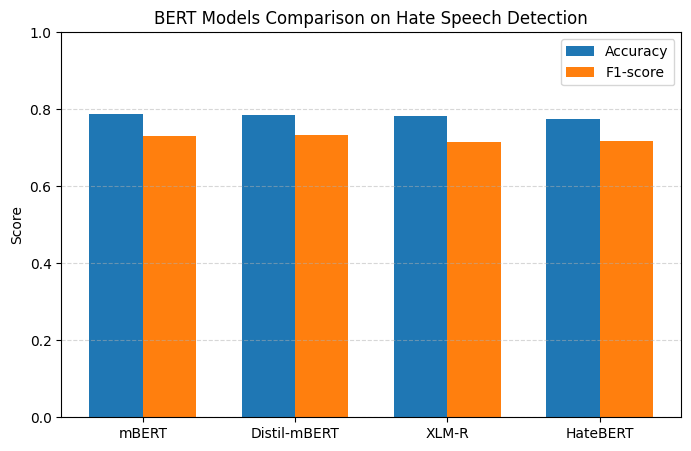

In [ ]:
# ======================================================
# 1. Install required libraries (run once in Colab)
# ======================================================
!pip install -q transformers datasets accelerate

# ======================================================
# 2. Imports
# ======================================================
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from datasets import Dataset
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
    DataCollatorWithPadding
)

import matplotlib.pyplot as plt

# For reproducibility
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

# ======================================================
# 3. Load combined dataset
# ======================================================
df = pd.read_csv("/content/combined_hate_dataset.csv")

# Expect columns: 'text' and 'label'
df = df.dropna(subset=["text", "label"])
df["label"] = df["label"].astype(int)

X = df["text"].astype(str).values
y = df["label"].values

# Train / temp split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=y
)

# Validation / test split
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=SEED, stratify=y_temp
)

print("Train size:", len(X_train))
print("Validation size:", len(X_val))
print("Test size:", len(X_test))

# ======================================================
# 4. Prepare base HuggingFace Datasets (raw text)
# ======================================================
train_raw = Dataset.from_dict({"text": list(X_train), "label": list(y_train)})
val_raw   = Dataset.from_dict({"text": list(X_val), "label": list(y_val)})
test_raw  = Dataset.from_dict({"text": list(X_test), "label": list(y_test)})

# ======================================================
# 5. Define models to compare (added HateBERT)
# ======================================================
model_ckpts = {
    "mBERT": "bert-base-multilingual-cased",
    "Distil-mBERT": "distilbert-base-multilingual-cased",
    "XLM-R": "xlm-roberta-base",
    "HateBERT": "GroNLP/hateBERT"
}

device = "cuda" if torch.cuda.is_available() else "cpu"
use_fp16 = torch.cuda.is_available()

print("Using device:", device)

# ======================================================
# 6. Metric function for Trainer
# ======================================================
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)

    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average="binary")
    prec = precision_score(labels, preds, average="binary")
    rec = recall_score(labels, preds, average="binary")

    return {
        "accuracy": acc,
        "f1": f1,
        "precision": prec,
        "recall": rec
    }

# ======================================================
# 7. Training loop for each model
# ======================================================
results = {}

for model_name, ckpt in model_ckpts.items():
    print("\n" + "="*70)
    print(f"Training model: {model_name} ({ckpt})")
    print("="*70)

    # 7.1 Load tokenizer (with safe guard)
    try:
        tokenizer = AutoTokenizer.from_pretrained(ckpt)
    except Exception as e:
        print(f"Failed to load tokenizer for {ckpt}: {e}")
        print("Skipping this model.\n")
        continue

    # 7.2 Tokenization function
    def tokenize_function(batch):
        return tokenizer(
            batch["text"],
            truncation=True,
            padding=False,  # padding done later by data collator
            max_length=128
        )

    # 7.3 Tokenize datasets
    try:
        train_ds = train_raw.map(tokenize_function, batched=True)
        val_ds   = val_raw.map(tokenize_function, batched=True)
        test_ds  = test_raw.map(tokenize_function, batched=True)
    except Exception as e:
        print(f"Tokenization failed for {model_name}: {e}")
        print("Skipping this model.\n")
        continue

    # Remove text column and set format
    # Only remove 'text' if it's present
    if "text" in train_ds.column_names:
        train_ds = train_ds.remove_columns(["text"])
    if "text" in val_ds.column_names:
        val_ds = val_ds.remove_columns(["text"])
    if "text" in test_ds.column_names:
        test_ds = test_ds.remove_columns(["text"])

    train_ds = train_ds.rename_column("label", "labels")
    val_ds   = val_ds.rename_column("label", "labels")
    test_ds  = test_ds.rename_column("label", "labels")

    train_ds.set_format("torch")
    val_ds.set_format("torch")
    test_ds.set_format("torch")

    # 7.4 Data collator for dynamic padding
    data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

    # 7.5 Load model (with safe guard)
    try:
        model = AutoModelForSequenceClassification.from_pretrained(
            ckpt,
            num_labels=2
        ).to(device)
    except Exception as e:
        print(f"Failed to load model for {ckpt}: {e}")
        print("Skipping this model.\n")
        continue

    # 7.6 Training arguments
    training_args = TrainingArguments(
        output_dir=f"./results_{model_name}",
        eval_strategy="epoch",
        save_strategy="epoch",
        logging_strategy="epoch",
        num_train_epochs=2,          # you can increase this
        per_device_train_batch_size=16,
        per_device_eval_batch_size=32,
        learning_rate=2e-5,
        load_best_model_at_end=True,
        metric_for_best_model="f1",
        greater_is_better=True,
        fp16=use_fp16,
        report_to="none"    # to avoid too much log noise
    )

    # 7.7 Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_ds,
        eval_dataset=val_ds,
        tokenizer=tokenizer,
        data_collator=data_collator,
        compute_metrics=compute_metrics
    )

    # 7.8 Train
    trainer.train()

    # 7.9 Evaluate on test set
    metrics = trainer.evaluate(test_ds)
    print(f"\nTest metrics for {model_name}:")
    for k, v in metrics.items():
        print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

    # Store only important metrics (use eval_ keys if present)
    results[model_name] = {
        "accuracy": metrics.get("eval_accuracy", metrics.get("accuracy", 0.0)),
        "f1": metrics.get("eval_f1", metrics.get("f1", 0.0)),
        "precision": metrics.get("eval_precision", metrics.get("precision", 0.0)),
        "recall": metrics.get("eval_recall", metrics.get("recall", 0.0))
    }

# ======================================================
# 8. Show comparison and plot graph
# ======================================================
print("\n\n===== FINAL COMPARISON =====")
for name, m in results.items():
    print(f"\nModel: {name}")
    print(f"Accuracy : {m['accuracy']:.4f}")
    print(f"F1-score : {m['f1']:.4f}")
    print(f"Precision: {m['precision']:.4f}")
    print(f"Recall   : {m['recall']:.4f}")

# -------- Plot Accuracy & F1 comparison --------
if results:
    model_names = list(results.keys())
    accuracies = [results[m]["accuracy"] for m in model_names]
    f1_scores  = [results[m]["f1"] for m in model_names]

    x = np.arange(len(model_names))
    width = 0.35

    plt.figure(figsize=(8, 5))
    plt.bar(x - width/2, accuracies, width, label="Accuracy")
    plt.bar(x + width/2, f1_scores, width, label="F1-score")

    plt.xticks(x, model_names)
    plt.ylabel("Score")
    plt.ylim(0, 1.0)
    plt.title("BERT Models Comparison on Hate Speech Detection")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.show()
else:
    print("No models were successfully trained/evaluated. Check earlier logs for errors.")


In [ ]:
# ============================================
# 0. Install required libraries (run once)
# ============================================
!pip install -q lime

# ============================================
# 1. Imports
# ============================================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

from lime.lime_text import LimeTextExplainer

# For reproducibility
SEED = 42
np.random.seed(SEED)

# ============================================
# 2. Load combined dataset
# ============================================
# Make sure combined_hate_dataset.csv is in your Colab working directory
df = pd.read_csv("combined_hate_dataset.csv")

# Expecting columns: text, label
df = df.dropna(subset=["text", "label"])
df["label"] = df["label"].astype(int)

print("Dataset shape:", df.shape)
print(df.head())

X = df["text"].astype(str).values
y = df["label"].values

# ============================================
# 3. Train-test split
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=SEED,
    stratify=y
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

# ============================================
# 4. TF-IDF Vectorization
# ============================================
tfidf = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=50000,
    sublinear_tf=True
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# ============================================
# 5. Train Logistic Regression model
# ============================================
model = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

model.fit(X_train_tfidf, y_train)

# ============================================
# 6. Evaluate model
# ============================================
y_pred = model.predict(X_test_tfidf)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n===== Logistic Regression Performance =====")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

# ============================================
# 7. Explainable AI with LIME
# ============================================
class_names = ["non-hate", "hate"]

# Prediction function for LIME (must return probabilities)
def predict_proba(texts):
    X_tfidf = tfidf.transform(texts)
    return model.predict_proba(X_tfidf)

# Create a LIME text explainer
explainer = LimeTextExplainer(class_names=class_names)

# Pick one example from the test set to explain
example_index = 0  # you can change this
example_text = X_test[example_index]
example_true_label = y_test[example_index]
example_pred_proba = predict_proba([example_text])[0]
example_pred_label = np.argmax(example_pred_proba)

print("\n================ LIME EXPLANATION ================")
print("Example index:", example_index)
print("Text:\n", example_text)
print("\nTrue label        :", class_names[example_true_label])
print("Predicted label   :", class_names[example_pred_label])
print("Predicted probas  :", example_pred_proba)

# Generate LIME explanation for this instance
exp = explainer.explain_instance(
    example_text,
    predict_proba,
    num_features=10,     # top 10 important words
    labels=[0, 1]        # explain both classes if you want
)

# Print important words for the 'hate' class (label=1)
print("\nTop contributing words for class 'hate':")
for word, weight in exp.as_list(label=1):
    print(f"{word:20s}  {weight:+.4f}")

# If you're in Colab / notebook, you can also show an HTML explanation:
# (uncomment the next line to see it in the output cell)
# exp.show_in_notebook(text=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Dataset shape: (22192, 2)
                                                text  label
0  quran bumpers like them worldwide should be sh...      1
1  is not the national rifle association that pro...      0
2  i hate that people think you can use it means ...      0
3             this lady is f king awesome during sex      0
4  mexico has done more to secure our border in d...      0
Train size: 17753
Test size: 4439

===== Logistic Regression Performance =====
Accuracy : 0.7578
Precision: 0.7274
Recall   : 0.6275
F1-score : 0.6737

Classification Report:

              precision    recall  f1-score   support

           0     0.7738    0.8442    0.8075      2670
           1     0.7274    0.6275    0.6737      1769

    accuracy                         0.7578      4439
   macro avg     0.7506    0.7358    0.7406      4439
weighted avg     0.7553    0.7578    0.7542 


===== Logistic Regression Results =====
Accuracy : 0.7517458887136742
Precision: 0.7144694533762058
Recall   : 0.6280384397964952
F1-score : 0.6684717208182912
              precision    recall  f1-score   support

           0     0.7718    0.8337    0.8016      2670
           1     0.7145    0.6280    0.6685      1769

    accuracy                         0.7517      4439
   macro avg     0.7432    0.7309    0.7350      4439
weighted avg     0.7490    0.7517    0.7485      4439



/tmp/ipython-input-981467816.py:85: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_lr, sample_data_lr, feature_names=feature_names, show=False)
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Glyph 2357 (\N{DEVANAGARI LETTER VA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing fro

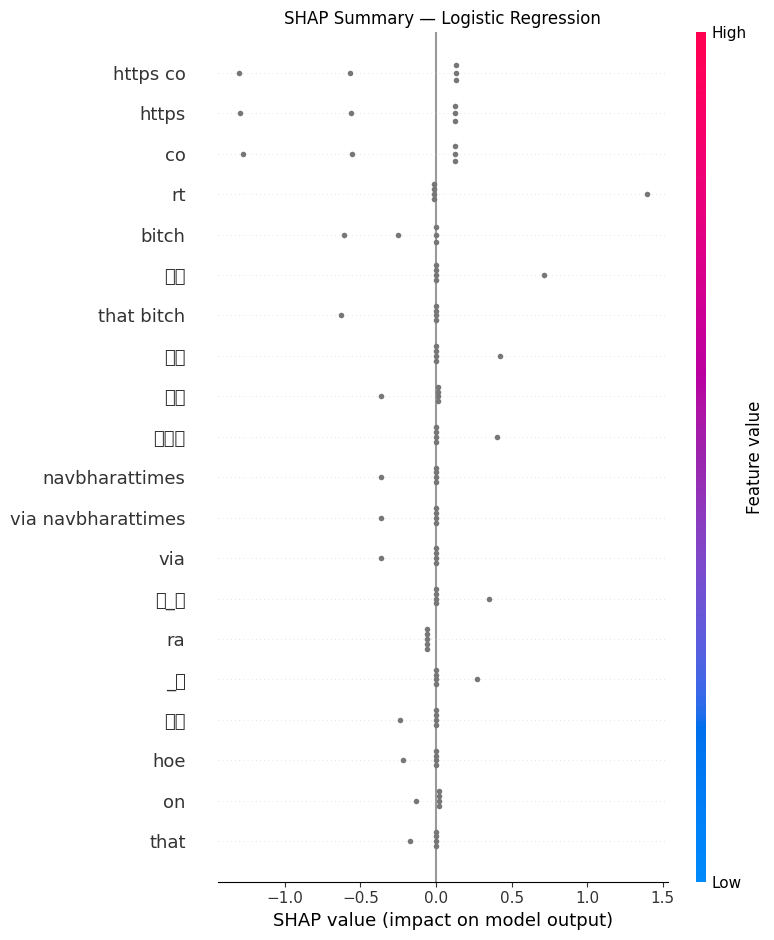


Local Explanation Example:
Tweet: oh wow avoiding that bitch


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

import shap
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6)

SEED = 42
np.random.seed(SEED)

# ============================================
# 2. Load dataset
# ============================================
df = pd.read_csv("/content/combined_hate_dataset.csv")
df = df.dropna(subset=["text", "label"])
df["label"] = df["label"].astype(int)

X = df["text"].astype(str).values
y = df["label"].values

# ============================================
# 3. Train-test split
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=y
)

# ============================================
# 4. FAST TF-IDF (Reduced features)
# ============================================
tfidf = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=8000,      # REDUCED FROM 50000 → VERY FAST
    sublinear_tf=True
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
feature_names = tfidf.get_feature_names_out()

# Convert sparse TF-IDF matrices to dense arrays for RandomForest and TreeExplainer
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()


# ============================================
# 5. Train Logistic Regression (FAST)
# ============================================
log_reg = LogisticRegression(max_iter=1000, n_jobs=-1)
log_reg.fit(X_train_tfidf, y_train)
y_pred_lr = log_reg.predict(X_test_tfidf)

print("\n===== Logistic Regression Results =====")
print("Accuracy :", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall   :", recall_score(y_test, y_pred_lr))
print("F1-score :", f1_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, digits=4))


# ============================================
# 7. SHAP — FAST Explainable AI
# ============================================
shap.initjs()

# SMALL samples → FAST
background_data_lr = X_train_tfidf[:50] # Logistic Regression can handle sparse
background_data_rf = X_train_dense[:50] # Use dense for RandomForest explainer
sample_data_lr = X_test_tfidf[:5]
sample_data_rf = X_test_dense[:5] # Use dense for RandomForest explainer

# ============================================
# 7A. FAST SHAP for Logistic Regression
# ============================================
explainer_lr = shap.LinearExplainer(log_reg, background_data_lr)
shap_values_lr = explainer_lr.shap_values(sample_data_lr)

plt.title("SHAP Summary — Logistic Regression")
shap.summary_plot(shap_values_lr, sample_data_lr, feature_names=feature_names, show=False)
plt.show()

# Local explanation (first example)
print("\nLocal Explanation Example:")
print("Tweet:", X_test[0])
shap.force_plot(explainer_lr.expected_value, shap_values_lr[0], feature_names=feature_names)


In [ ]:
# ============================================
# 0. (Optional) Install TensorFlow if needed
# ============================================
# If TensorFlow is not installed, uncomment this:
# !pip install tensorflow

# ============================================
# 1. Imports
# ============================================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Input

print("TensorFlow version:", tf.__version__)

# ============================================
# 2. Load Dataset
# ============================================
# Make sure the CSV file is in the current directory
df = pd.read_csv("combined_hate_dataset.csv")

# Assumes columns: "text" and "label"
df = df.dropna(subset=["text", "label"])

texts = df["text"].astype(str).tolist()
labels = df["label"].astype(int).tolist()  # 0 = non-hate, 1 = hate (adjust if needed)

print("Number of samples:", len(texts))

# ============================================
# 3. Preprocessing: Tokenization & Padding
# ============================================
max_words = 10000   # vocabulary size
max_len = 50        # max tokens per text

tokenizer = Tokenizer(num_words=max_words, oov_token="<UNK>")
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=max_len, padding="post", truncating="post")
y = np.array(labels)

print("X shape:", X.shape)
print("y shape:", y.shape)

# ============================================
# 4. Train / Test Split
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size :", X_test.shape[0])

# ============================================
# 5. Build a CNN Text Classifier
# ============================================
embedding_dim = 128

model = Sequential([
    Embedding(input_dim=max_words,
              output_dim=embedding_dim,
              input_length=max_len,
              name="embedding_layer"),
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model.summary()

# ============================================
# 6. Train Model
# ============================================
history = model.fit(
    X_train, y_train,
    epochs=3,           # increase if you want better accuracy
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# ============================================
# 7. Evaluate Model
# ============================================
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ============================================
# 8. Prepare Model for Integrated Gradients
#    (IG over the Embedding space)
# ============================================
# Get embedding layer
embedding_layer = model.get_layer("embedding_layer")
embed_dim = embedding_layer.output_dim

# Build "post-embedding" model: takes embeddings -> outputs prediction
post_input = Input(shape=(max_len, embed_dim), name="post_embedding_input")
x = post_input
for layer in model.layers[1:]:   # skip embedding layer (index 0)
    x = layer(x)
post_emb_model = Model(inputs=post_input, outputs=x)

# ============================================
# 9. Integrated Gradients Implementation
# ============================================
def integrated_gradients(input_ids, steps=50):
    """
    input_ids: numpy array of shape (1, max_len) with token IDs
    steps: number of interpolation steps
    returns: importance scores for each position (length max_len)
    """
    # Convert to tensor
    input_ids = tf.constant(input_ids, dtype=tf.int32)

    # Get embeddings for this input (shape: (1, max_len, embed_dim))
    emb = embedding_layer(input_ids)[0]           # (max_len, embed_dim)
    baseline = tf.zeros_like(emb)                # zero-baseline

    # Interpolate embeddings between baseline and actual embedding
    alphas = tf.linspace(0.0, 1.0, steps)        # (steps,)
    alphas = alphas[:, tf.newaxis, tf.newaxis]   # (steps, 1, 1)

    emb_expanded = tf.expand_dims(emb, axis=0)   # (1, max_len, embed_dim)
    baseline_expanded = tf.expand_dims(baseline, axis=0)  # (1, max_len, embed_dim)

    interpolated_embs = baseline_expanded + alphas * (emb_expanded - baseline_expanded)  # (steps, max_len, embed_dim)

    # Compute gradients of prediction w.r.t interpolated embeddings
    with tf.GradientTape() as tape:
        tape.watch(interpolated_embs)
        preds = post_emb_model(interpolated_embs)    # (steps, 1)
        target = preds[:, 0]                         # predicted hate prob

    grads = tape.gradient(target, interpolated_embs)  # (steps, max_len, embed_dim)

    # Average gradients across all steps
    avg_grads = tf.reduce_mean(grads, axis=0)       # (max_len, embed_dim)

    # Integrated gradients: (embedding - baseline) * avg_grad
    integrated_grads = (emb - baseline) * avg_grads  # (max_len, embed_dim)

    # Aggregate over embedding dimension to get one importance score per token
    token_importances = tf.reduce_sum(integrated_grads, axis=-1)  # (max_len,)

    return token_importances.numpy()


# ============================================
# 10. Helper: Predict & Explain a Text
# ============================================
def predict_and_explain(text, steps=50, top_k=10):
    """
    text: raw input string
    steps: IG steps
    top_k: print top_k most important words
    """
    # Preprocess text -> ids
    seq = tokenizer.texts_to_sequences([text])
    seq_padded = pad_sequences(seq, maxlen=max_len, padding="post", truncating="post")

    # Model prediction
    prob = float(model.predict(seq_padded)[0][0])
    label = "HATE" if prob >= 0.5 else "NON-HATE"

    print(f"\nText: {text}")
    print(f"Predicted label: {label} (prob = {prob:.4f})")

    # Compute integrated gradients
    ig_scores = integrated_gradients(seq_padded, steps=steps)

    # Map token positions -> words & scores (ignore padding = 0)
    token_ids = seq_padded[0]
    word_scores = []
    for idx, tok_id in enumerate(token_ids):
        if tok_id == 0:
            continue  # padding
        word = tokenizer.index_word.get(int(tok_id), "<UNK>")
        score = float(ig_scores[idx])
        word_scores.append((word, score))

    # Sort by absolute importance (descending)
    word_scores_sorted = sorted(word_scores, key=lambda x: abs(x[1]), reverse=True)

    print(f"\nTop {min(top_k, len(word_scores_sorted))} important words (Integrated Gradients):")
    for word, score in word_scores_sorted[:top_k]:
        print(f"{word:15s} -> {score:+.4f}")

    return label, prob, word_scores_sorted


# ============================================
# 11. Example: User Input Tweet Testing
# ============================================

while True:
    user_text = input("\nEnter a tweet (or type 'quit' to stop): ").strip()
    if user_text.lower() == "quit":
        print("Exiting interactive explanation.")
        break
    if not user_text:
        print("Please enter some text.")
        continue

    predict_and_explain(user_text, steps=50, top_k=10)

TensorFlow version: 2.19.0
Number of samples: 22192
X shape: (22192, 50)
y shape: (22192,)
Train size: 17753
Test size : 4439


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_layer (Embedding)     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.6620 - loss: 0.5726 - val_accuracy: 0.7708 - val_loss: 0.4669
Epoch 2/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8257 - loss: 0.3723 - val_accuracy: 0.7765 - val_loss: 0.5155
Epoch 3/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9226 - loss: 0.2008 - val_accuracy: 0.7472 - val_loss: 0.6920
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step

Test Accuracy: 0.7413831944131561

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77      2670
           1       0.64      0.78      0.71      1769

    accuracy                           0.74      4439
   macro avg       0.74      0.75      0.74      4439
weighted avg       0.76      0.74      0.74      4439


Enter a tweet (or type 'quit' to stop): you know what she is a terrible whore
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

Text: you know what she is a terrible whore
Predicted label: HATE (pr

In [ ]:
# ============================================
# 1. Imports
# ============================================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

# Reproducibility
SEED = 42
np.random.seed(SEED)

# ============================================
# 2. Load combined dataset
# ============================================
# Make sure combined_hate_dataset.csv is in your Colab working directory
df = pd.read_csv("combined_hate_dataset.csv")

# Columns: text, label
df = df.dropna(subset=["text", "label"])
df["label"] = df["label"].astype(int)

print("Dataset shape:", df.shape)
print(df.head())

X = df["text"].astype(str).values   # comments / tweets
y = df["label"].values              # 0 = non-hate, 1 = hate

# ============================================
# 3. Train-test split
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 80% train, 20% test
    random_state=SEED,
    stratify=y
)

print("Train size:", len(X_train))
print("Test size :", len(X_test))

# ============================================
# 4. TF-IDF Vectorization
# ============================================
tfidf = TfidfVectorizer(
    ngram_range=(1, 2),     # unigrams + bigrams
    max_features=50000,
    sublinear_tf=True
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

# ============================================
# 5. Train Logistic Regression model
# ============================================
model = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

model.fit(X_train_tfidf, y_train)

# ============================================
# 6. Evaluate on test data
# ============================================
y_pred = model.predict(X_test_tfidf)

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)

print("\n===== Test Set Performance =====")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

# ============================================
# 7. Function to test NEW tweets / sentences
# ============================================
label_map = {0: "NON-HATE", 1: "HATE"}

def predict_text(text):
    """
    User ichina oka text ni hate / non-hate ani predict chestundi.
    """
    text_list = [text]
    text_tfidf = tfidf.transform(text_list)
    pred_label = model.predict(text_tfidf)[0]
    pred_proba = model.predict_proba(text_tfidf)[0][pred_label]
    return pred_label, label_map[pred_label], float(pred_proba)

# ============================================
# 8. User input example (testing like real use)
# ============================================
user_tweet = input("\nEnter a tweet/sentence to check (hate or non-hate): ")

pred_id, pred_name, prob = predict_text(user_tweet)

print("\nYour text       :", user_tweet)
print("Model prediction:", pred_name)
print("Confidence      :", round(prob, 4))

Dataset shape: (22192, 2)
                                                text  label
0  quran bumpers like them worldwide should be sh...      1
1  is not the national rifle association that pro...      0
2  i hate that people think you can use it means ...      0
3             this lady is f king awesome during sex      0
4  mexico has done more to secure our border in d...      0
Train size: 17753
Test size : 4439

===== Test Set Performance =====
Accuracy : 0.7578
Precision: 0.7274
Recall   : 0.6275
F1-score : 0.6737

Classification Report:

              precision    recall  f1-score   support

           0     0.7738    0.8442    0.8075      2670
           1     0.7274    0.6275    0.6737      1769

    accuracy                         0.7578      4439
   macro avg     0.7506    0.7358    0.7406      4439
weighted avg     0.7553    0.7578    0.7542      4439


Enter a tweet/sentence to check (hate or non-hate): mexico has done more to secure our border in days than democrats in 